### Cardiac Arrhythmia Multi-Class Classification 

Analyzed data and addressed missing data

Evaluation strategy{ The evaluation strategy used is Recall_weighted.Addressing the false negatives in this classification is paramount; an incorrect prediction can adversely impact the course of treatment for a patient particularly when the algorithm fails to detect a medical condition when it is present.

Determined the best parameters for the following classification models: 
- KNN classifcation 
- Logistic Regression
- Linear Supprt Vector Machine
- Kerenilzed Support Vector Machine
- Decision Tree
- Random Forest 

Used different bagging and boosting methods to boost the results.

Next, used data reduction method to reduce the size of data, and reran above models. 

This analysis is conducted on the cardiac arrhythmia dataset with 452 samples classified into 16 different class codes.There are a total of 279 variables, therefore we will apply feature selection to select the most revelant features.The exploratory analysis of the data is as follows:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sea

data = pd.read_csv('cardiac_arrhythmia.csv')

In [2]:
data.head()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6-Amp-Q_wave,V6-Amp-R_wave,V6-Amp-S_wave,V6-Amp-R'_wave,V6-Amp-S'_wave,V6-Amp-P_wave,V6-Amp-T_wave,V6-Amp-QRSA,V6-Amp-QRSTA,Class_Code
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [3]:
data.describe()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6-Amp-Q_wave,V6-Amp-R_wave,V6-Amp-S_wave,V6-Amp-R'_wave,V6-Amp-S'_wave,V6-Amp-P_wave,V6-Amp-T_wave,V6-Amp-QRSA,V6-Amp-QRSTA,Class_Code
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [4]:
data.shape

(452, 280)

In [5]:
data.dtypes

Age                                                        int64
Sex                                                        int64
Height                                                     int64
Weight                                                     int64
QRS_duration                                               int64
P-R_interval                                               int64
Q-T_interval                                               int64
T_interval                                                 int64
P_interval                                                 int64
QRS                                                        int64
T                                                         object
P                                                         object
QRST                                                      object
J                                                         object
Heart_rate                                                object
DI-Q_wave                

In [6]:
import numpy as np
data = data.replace('?',np.NaN)

In [7]:
data['T'] = data['T'].astype(str).astype(float)

In [8]:
data['P'] = data['P'].astype(str).astype(float)

In [9]:
data['QRST'] = data['QRST'].astype(str).astype(float)


In [10]:
data['J'] = data['J'].astype(str).astype(float)


In [11]:
data['Heart_rate'] = data['Heart_rate'].astype(str).astype(float)

In [12]:
data.dtypes

Age                                                        int64
Sex                                                        int64
Height                                                     int64
Weight                                                     int64
QRS_duration                                               int64
P-R_interval                                               int64
Q-T_interval                                               int64
T_interval                                                 int64
P_interval                                                 int64
QRS                                                        int64
T                                                        float64
P                                                        float64
QRST                                                     float64
J                                                        float64
Heart_rate                                               float64
DI-Q_wave                

In [13]:
data.isnull().sum()

Age                                                        0
Sex                                                        0
Height                                                     0
Weight                                                     0
QRS_duration                                               0
P-R_interval                                               0
Q-T_interval                                               0
T_interval                                                 0
P_interval                                                 0
QRS                                                        0
T                                                          8
P                                                         22
QRST                                                       1
J                                                        376
Heart_rate                                                 1
DI-Q_wave                                                  0
DI-R_wave               

In [14]:
data.isnull().values.sum()


408

In [15]:
#dropping the column because it has 376 missing values
#imputing these values will be an error
#Also on researching about the topic, found that the J vector angle is not a significant attribute
data1 = data.drop(['J'], axis = 1)
data1.shape

(452, 279)

In [16]:
data1.isnull().sum()

Age                                                       0
Sex                                                       0
Height                                                    0
Weight                                                    0
QRS_duration                                              0
P-R_interval                                              0
Q-T_interval                                              0
T_interval                                                0
P_interval                                                0
QRS                                                       0
T                                                         8
P                                                        22
QRST                                                      1
Heart_rate                                                1
DI-Q_wave                                                 0
DI-R_wave                                                 0
DI-S_wave                               

In [17]:
data1.groupby(['Class_Code'])[["P"]].mean()

,P
Class_Code,
1,49.301255
2,43.731707
3,47.153846
4,58.333333
5,51.461538
6,45.250000
7,68.666667
8,47.500000
9,34.333333


To address missing values we have used fancy impute with MICE since medical data is sensitive to any random imputations. Hence we have used the above mentioned method because it considers all the attributes and runs a regression to impute the missing values, therefore reducing the randomness in the imputed values.

In [18]:
from fancyimpute import MICE
data2 = pd.DataFrame(MICE().complete(data1))

C:\Users\garim\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[MICE] Completing matrix with shape (452, 279)
[MICE] Starting imputation round 1/110, elapsed time 0.000
[MICE] Starting imputation round 2/110, elapsed time 0.031
[MICE] Starting imputation round 3/110, elapsed time 0.047
[MICE] Starting imputation round 4/110, elapsed time 0.078
[MICE] Starting imputation round 5/110, elapsed time 0.094
[MICE] Starting imputation round 6/110, elapsed time 0.125
[MICE] Starting imputation round 7/110, elapsed time 0.141
[MICE] Starting imputation round 8/110, elapsed time 0.172
[MICE] Starting imputation round 9/110, elapsed time 0.188
[MICE] Starting imputation round 10/110, elapsed time 0.261
[MICE] Starting imputation round 11/110, elapsed time 0.293
[MICE] Starting imputation round 12/110, elapsed time 0.321
[MICE] Starting imputation round 13/110, elapsed time 0.328
[MICE] Starting imputation round 14/110, elapsed time 0.359
[MICE] Starting imputation round 15/110, elapsed time 0.398
[MICE] Starting imputation round 16/110, elapsed time 0.418
[M

In [19]:
data2.columns = ['Age1',
'Sex',
'Height',
'Weight',
'QRS_duration',
'P-R_interval',
'Q-T_interval',
'T_interval',
'P_interval',
'QRS',
'T',
'P',
'QRST',
'Heart_rate',
'DI-Q_wave',
'DI-R_wave',
'DI-S_wave',
'DI-R`_wave',
'DI-S`_wave',
'DI-Number_of_intrinsic_deflections_linear',
'DI-Existence_of_ragged_R_wave_nominal',
'DI-Existence_of_diphasic_derivation_of_R_wave_nominal',
'DI-Existence_of_ragged_P_wave_nominal',
'DI-Existence_of_diphasic_derivation_of_P_wave_nominal',
'DI-Existence_of_ragged_T_wave_nominal',
'DI-Existence_of_diphasic_derivation_of_T_wave_nominal',
'DII-Q_wave',
'DII-R_wave',
'DII-S_wave',
'DII-R`_wave',
'DII-S`_wave',
'DII-Number_of_intrinsic_deflections_linear',
'DII-Existence_of_ragged_R_wave_nominal',
'DII-Existence_of_diphasic_derivation_of_R_wave_nominal',
'DII-Existence_of_ragged_P_wave_nominal',
'DII-Existence_of_diphasic_derivation_of_P_wave_nominal',
'DII-Existence_of_ragged_T_wave_nominal',
'DII-Existence_of_diphasic_derivation_of_T_wave_nominal',
'DIII-Q_wave',
'DIII-R_wave',
'DIII-S_wave',
'DIII-R`_wave',
'DIII-S`_wave',
'DIII-Number_of_intrinsic_deflections_linear',
'DIII-Existence_of_ragged_R_wave_nominal',
'DIII-Existence_of_diphasic_derivation_of_R_wave_nominal',
'DIII-Existence_of_ragged_P_wave_nominal',
'DIII-Existence_of_diphasic_derivation_of_P_wave_nominal',
'DIII-Existence_of_ragged_T_wave_nominal',
'DIII-Existence_of_diphasic_derivation_of_T_wave_nominal',
'AVR-Q_wave',
'AVR-R_wave',
'AVR-S_wave',
'AVR-R`_wave',
'AVR-S`_wave',
'AVR-Number_of_intrinsic_deflections_linear',
'AVR-Existence_of_ragged_R_wave_nominal',
'AVR-Existence_of_diphasic_derivation_of_R_wave_nominal',
'AVR-Existence_of_ragged_P_wave_nominal',
'AVR-Existence_of_diphasic_derivation_of_P_wave_nominal',
'AVR-Existence_of_ragged_T_wave_nominal',
'AVR-Existence_of_diphasic_derivation_of_T_wave_nominal',
'AVL-Q_wave',
'AVL-R_wave',
'AVL-S_wave',
'AVL-R`_wave',
'AVL-S`_wave',
'AVL-Number_of_intrinsic_deflections_linear',
'AVL-Existence_of_ragged_R_wave_nominal',
'AVL-Existence_of_diphasic_derivation_of_R_wave_nominal',
'AVL-Existence_of_ragged_P_wave_nominal',
'AVL-Existence_of_diphasic_derivation_of_P_wave_nominal',
'AVL-Existence_of_ragged_T_wave_nominal',
'AVL-Existence_of_diphasic_derivation_of_T_wave_nominal',
'AVF-Q_wave',
'AVF-R_wave',
'AVF-S_wave',
'AVF-R`_wave',
'AVF-S`_wave',
'AVF-Number_of_intrinsic_deflections_linear',
'AVF-Existence_of_ragged_R_wave_nominal',
'AVF-Existence_of_diphasic_derivation_of_R_wave_nominal',
'AVF-Existence_of_ragged_P_wave_nominal',
'AVF-Existence_of_diphasic_derivation_of_P_wave_nominal',
'AVF-Existence_of_ragged_T_wave_nominal',
'AVF-Existence_of_diphasic_derivation_of_T_wave_nominal',
'V1-Q_wave',
'V1-R_wave',
'V1-S_wave',
'V1-R`_wave',
'V1-S`_wave',
'V1-Number_of_intrinsic_deflections_linear',
'V1-Existence_of_ragged_R_wave_nominal',
'V1-Existence_of_diphasic_derivation_of_R_wave_nominal',
'V1-Existence_of_ragged_P_wave_nominal',
'V1-Existence_of_diphasic_derivation_of_P_wave_nominal',
'V1-Existence_of_ragged_T_wave_nominal',
'V1-Existence_of_diphasic_derivation_of_T_wave_nominal',
'V2-Q_wave',
'V2-R_wave',
'V2-S_wave',
'V2-R`_wave',
'V2-S`_wave',
'V2-Number_of_intrinsic_deflections_linear',
'V2-Existence_of_ragged_R_wave_nominal',
'V2-Existence_of_diphasic_derivation_of_R_wave_nominal',
'V2-Existence_of_ragged_P_wave_nominal',
'V2-Existence_of_diphasic_derivation_of_P_wave_nominal',
'V2-Existence_of_ragged_T_wave_nominal',
'V2-Existence_of_diphasic_derivation_of_T_wave_nominal',
'V3-Q_wave',
'V3-R_wave',
'V3-S_wave',
'V3-R`_wave',
'V3-S`_wave',
'V3-Number_of_intrinsic_deflections_linear',
'V3-Existence_of_ragged_R_wave_nominal',
'V3-Existence_of_diphasic_derivation_of_R_wave_nominal',
'V3-Existence_of_ragged_P_wave_nominal',
'V3-Existence_of_diphasic_derivation_of_P_wave_nominal',
'V3-Existence_of_ragged_T_wave_nominal',
'V3-Existence_of_diphasic_derivation_of_T_wave_nominal',
'V4-Q_wave',
'V4-R_wave',
'V4-S_wave',
'V4-R`_wave',
'V4-S`_wave',
'V4-Number_of_intrinsic_deflections_linear',
'V4-Existence_of_ragged_R_wave_nominal',
'V4-Existence_of_diphasic_derivation_of_R_wave_nominal',
'V4-Existence_of_ragged_P_wave_nominal',
'V4-Existence_of_diphasic_derivation_of_P_wave_nominal',
'V4-Existence_of_ragged_T_wave_nominal',
'V4-Existence_of_diphasic_derivation_of_T_wave_nominal',
'V5-Q_wave',
'V5-R_wave',
'V5-S_wave',
'V5-R`_wave',
'V5-S`_wave',
'V5-Number_of_intrinsic_deflections_linear',
'V5-Existence_of_ragged_R_wave_nominal',
'V5-Existence_of_diphasic_derivation_of_R_wave_nominal',
'V5-Existence_of_ragged_P_wave_nominal',
'V5-Existence_of_diphasic_derivation_of_P_wave_nominal',
'V5-Existence_of_ragged_T_wave_nominal',
'V5-Existence_of_diphasic_derivation_of_T_wave_nominal',
'V6-Q_wave',
'V6-R_wave',
'V6-S_wave',
'V6-R`_wave',
'V6-S`_wave',
'V6-Number_of_intrinsic_deflections_linear',
'V6-Existence_of_ragged_R_wave_nominal',
'V6-Existence_of_diphasic_derivation_of_R_wave_nominal',
'V6-Existence_of_ragged_P_wave_nominal',
'V6-Existence_of_diphasic_derivation_of_P_wave_nominal',
'V6-Existence_of_ragged_T_wave_nominal',
'V6-Existence_of_diphasic_derivation_of_T_wave_nominal',
'DI-Amp-JJ_wave',
'DI-Amp-Q_wave',
'DI-Amp-R_wave',
'DI-Amp-S_wave',
'DI-Amp-R`_wave',
'DI-Amp-S`_wave',
'DI-Amp-P_wave',
'DI-Amp-T_wave',
'DI-Amp-QRSA',
'DI-Amp-QRSTA',
'DII-Amp-JJ_wave',
'DII-Amp-Q_wave',
'DII-Amp-R_wave',
'DII-Amp-S_wave',
'DII-Amp-R`_wave',
'DII-Amp-S`_wave',
'DII-Amp-P_wave',
'DII-Amp-T_wave',
'DII-Amp-QRSA',
'DII-Amp-QRSTA',
'DIII-Amp-JJ_wave',
'DIII-Amp-Q_wave',
'DIII-Amp-R_wave',
'DIII-Amp-S_wave',
'DIII-Amp-R`_wave',
'DIII-Amp-S`_wave',
'DIII-Amp-P_wave',
'DIII-Amp-T_wave',
'DIII-Amp-QRSA',
'DIII-Amp-QRSTA',
'AVR-Amp-JJ_wave',
'AVR-Amp-Q_wave',
'AVR-Amp-R_wave',
'AVR-Amp-S_wave',
'AVR-Amp-R`_wave',
'AVR-Amp-S`_wave',
'AVR-Amp-P_wave',
'AVR-Amp-T_wave',
'AVR-Amp-QRSA',
'AVR-Amp-QRSTA',
'AVL-Amp-JJ_wave',
'AVL-Amp-Q_wave',
'AVL-Amp-R_wave',
'AVL-Amp-S_wave',
'AVL-Amp-R`_wave',
'AVL-Amp-S`_wave',
'AVL-Amp-P_wave',
'AVL-Amp-T_wave',
'AVL-Amp-QRSA',
'AVL-Amp-QRSTA',
'AVF-Amp-JJ_wave',
'AVF-Amp-Q_wave',
'AVF-Amp-R_wave',
'AVF-Amp-S_wave',
'AVF-Amp-R`_wave',
'AVF-Amp-S`_wave',
'AVF-Amp-P_wave',
'AVF-Amp-T_wave',
'AVF-Amp-QRSA',
'AVF-Amp-QRSTA',
'V1-Amp-JJ_wave',
'V1-Amp-Q_wave',
'V1-Amp-R_wave',
'V1-Amp-S_wave',
'V1-Amp-R`_wave',
'V1-Amp-S`_wave',
'V1-Amp-P_wave',
'V1-Amp-T_wave',
'V1-Amp-QRSA',
'V1-Amp-QRSTA',
'V2-Amp-JJ_wave',
'V2-Amp-Q_wave',
'V2-Amp-R_wave',
'V2-Amp-S_wave',
'V2-Amp-R`_wave',
'V2-Amp-S`_wave',
'V2-Amp-P_wave',
'V2-Amp-T_wave',
'V2-Amp-QRSA',
'V2-Amp-QRSTA',
'V3-Amp-JJ_wave',
'V3-Amp-Q_wave',
'V3-Amp-R_wave',
'V3-Amp-S_wave',
'V3-Amp-R`_wave',
'V3-Amp-S`_wave',
'V3-Amp-P_wave',
'V3-Amp-T_wave',
'V3-Amp-QRSA',
'V3-Amp-QRSTA',
'V4-Amp-JJ_wave',
'V4-Amp-Q_wave',
'V4-Amp-R_wave',
'V4-Amp-S_wave',
'V4-Amp-R`_wave',
'V4-Amp-S`_wave',
'V4-Amp-P_wave',
'V4-Amp-T_wave',
'V4-Amp-QRSA',
'V4-Amp-QRSTA',
'V5-Amp-JJ_wave',
'V5-Amp-Q_wave',
'V5-Amp-R_wave',
'V5-Amp-S_wave',
'V5-Amp-R`_wave',
'V5-Amp-S`_wave',
'V5-Amp-P_wave',
'V5-Amp-T_wave',
'V5-Amp-QRSA',
'V5-Amp-QRSTA',
'V6-Amp-JJ_wave',
'V6-Amp-Q_wave',
'V6-Amp-R_wave',
'V6-Amp-S_wave',
'V6-Amp-R`_wave',
'V6-Amp-S`_wave',
'V6-Amp-P_wave',
'V6-Amp-T_wave',
'V6-Amp-QRSA',
'V6-Amp-QRSTA',
'Class_Code']


In [20]:
data2.head()

,Age1,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6-Amp-Q_wave,V6-Amp-R_wave,V6-Amp-S_wave,V6-Amp-R`_wave,V6-Amp-S`_wave,V6-Amp-P_wave,V6-Amp-T_wave,V6-Amp-QRSA,V6-Amp-QRSTA,Class_Code
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [21]:
data2.isnull().values.sum()

0

# Splitting into train and test sets

In [73]:
X = data2.drop(['Class_Code'],axis = 1)
Y = data2['Class_Code']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size = 0.2)

In [75]:
print ('X_train shape is : ', X_train.shape)
print('X_test shape is : ', X_test.shape)
print('Y_train shape is : ', Y_train.shape)
print('Y_test shape is : ', Y_test.shape)

X_train shape is :  (361, 278)
X_test shape is :  (91, 278)
Y_train shape is :  (361,)
Y_test shape is :  (91,)


# Scaled using MinMax Scaler

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Evaluation Strategy:
The evaluation strategy used is Recall_weighted.Addressing the false negatives in this classification is paramount; an incorrect prediction can adversely impact the course of treatment for a patient particularly when the algorithm fails to detect a medical condition when it is present.

### 1. LogisticRegression

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(clf, param_grid, cv = 2, scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 1}
Best score 0.68


In [78]:
clf = LogisticRegression(C=1).fit(X_train_scaled,Y_train)
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'.format(clf.score(X_train_scaled,Y_train)))
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(clf.score(X_test_scaled,Y_test)))


Accuracy of Logistic Regression Classifier on training set: 0.83
Accuracy of Logistic Regression Classifier on test set: 0.65


### 2. KNN

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20, 25, 30]}

grid_search = GridSearchCV(knn, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'n_neighbors': 5}
Best score 0.58


In [80]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, Y_test)))

Accuracy of K-NN classifier on training set: 0.65
Accuracy of K-NN classifier on test set: 0.59


### 3. SVC Linear

In [81]:
from sklearn.svm import SVC
svclinear = SVC(kernel = 'linear')
param_grid = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svclinear, param_grid, cv = 2)
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 0.5, 'gamma': 0.001}
Best score 0.69


In [82]:
svclinear = SVC(kernel = 'linear',C=0.5,gamma=0.001)
svclinear.fit(X_train_scaled, Y_train)

print(svclinear.score(X_train_scaled, Y_train))
print(svclinear.score(X_test_scaled, Y_test))

0.8476454293628809
0.7032967032967034


### 4. SVC Kernel

In [83]:
from sklearn.svm import SVC
svckernal = SVC(kernel = 'rbf')
param_grid = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svckernal, param_grid, cv = 2)
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 5, 'gamma': 0.05}
Best score 0.70


In [84]:
svckernal = SVC(kernel = 'rbf',C=5,gamma=0.05)
svckernal.fit(X_train_scaled, Y_train)

print(svckernal.score(X_train_scaled, Y_train))
print(svckernal.score(X_test_scaled, Y_test))

0.8670360110803325
0.7032967032967034


### 5. Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DTC = DecisionTreeClassifier()

param_grid = {'max_depth': range(1,11)}

grid_search = GridSearchCV(DTC, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)   

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 6}
Best score 0.70


In [86]:
DTC = DecisionTreeClassifier(max_depth=6)
DTC.fit(X_train_scaled,Y_train)

print(DTC.score(X_train_scaled, Y_train))
print(DTC.score(X_test_scaled, Y_test))

0.8448753462603878
0.5604395604395604


### 6. Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier()

param_grid = {'max_depth': range(1,11),'n_estimators' : [10,50,100,150,200]}

grid_search = GridSearchCV(RFC, param_grid, cv = 2 ,scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)   

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 10, 'n_estimators': 150}
Best score 0.71


In [88]:
RFC = RandomForestClassifier(max_depth=10,n_estimators= 150)
RFC.fit(X_train_scaled,Y_train)

print(RFC.score(X_train_scaled, Y_train))
print(RFC.score(X_test_scaled, Y_test))

0.96398891966759
0.6813186813186813


# Bagging Multiple Classifiers

### 1. Logistic Regression

In [89]:
from sklearn.ensemble import BaggingClassifier

bag_clf= BaggingClassifier(clf, max_samples = 100, random_state = 10)
bag_clf.fit(X_train_scaled, Y_train)

print('Accuracy of bagging classifier on training set: {:.2f}'
     .format(bag_clf.score(X_train_scaled, Y_train)))
print('Accuracy of bagging classifier on test set: {:.2f}\n'
     .format(bag_clf.score(X_test_scaled, Y_test)))


Accuracy of bagging classifier on training set: 0.66
Accuracy of bagging classifier on test set: 0.63



### 2. KNN

In [90]:
from sklearn.ensemble import BaggingClassifier

bag_knn= BaggingClassifier(knn, max_samples = 100, random_state = 10)
bag_knn.fit(X_train_scaled, Y_train)

print('Accuracy of bagging classifier on training set: {:.2f}'
     .format(bag_knn.score(X_train_scaled, Y_train)))
print('Accuracy of bagging classifier on test set: {:.2f}\n'
     .format(bag_knn.score(X_test_scaled, Y_test)))


Accuracy of bagging classifier on training set: 0.55
Accuracy of bagging classifier on test set: 0.55



### 3. SVC Linear

In [91]:
from sklearn.ensemble import BaggingClassifier

bag_svclinear= BaggingClassifier(svclinear, max_samples = 100, random_state = 10)
bag_svclinear.fit(X_train_scaled, Y_train)

print('Accuracy of bagging classifier on training set: {:.2f}'
     .format(bag_svclinear.score(X_train_scaled, Y_train)))
print('Accuracy of bagging classifier on test set: {:.2f}\n'
     .format(bag_svclinear.score(X_test_scaled, Y_test)))


Accuracy of bagging classifier on training set: 0.63
Accuracy of bagging classifier on test set: 0.58



### 4. SVC Kernel

In [92]:
from sklearn.ensemble import BaggingClassifier

bag_svckernal= BaggingClassifier(svckernal, max_samples = 100, random_state = 10)
bag_svckernal.fit(X_train_scaled, Y_train)

print('Accuracy of bagging classifier on training set: {:.2f}'
     .format(bag_svckernal.score(X_train_scaled, Y_train)))
print('Accuracy of bagging classifier on test set: {:.2f}\n'
     .format(bag_svckernal.score(X_test_scaled, Y_test)))

Accuracy of bagging classifier on training set: 0.61
Accuracy of bagging classifier on test set: 0.58



### 5. Decision Tree

In [93]:
from sklearn.ensemble import BaggingClassifier

bag_DTC= BaggingClassifier(DTC, max_samples = 100, random_state = 10)
bag_DTC.fit(X_train_scaled, Y_train)

print('Accuracy of bagging classifier on training set: {:.2f}'
     .format(bag_DTC.score(X_train_scaled, Y_train)))
print('Accuracy of bagging classifier on test set: {:.2f}\n'
     .format(bag_DTC.score(X_test_scaled, Y_test)))

Accuracy of bagging classifier on training set: 0.78
Accuracy of bagging classifier on test set: 0.63



### 6. Random Forest

In [94]:
from sklearn.ensemble import BaggingClassifier

bag_RFC= BaggingClassifier(RFC, max_samples = 100, random_state = 10)
bag_RFC.fit(X_train_scaled, Y_train)

print('Accuracy of bagging classifier on training set: {:.2f}'
     .format(bag_RFC.score(X_train_scaled, Y_train)))
print('Accuracy of bagging classifier on test set: {:.2f}\n'
     .format(bag_RFC.score(X_test_scaled, Y_test)))

Accuracy of bagging classifier on training set: 0.72
Accuracy of bagging classifier on test set: 0.58



# Gradient Boosting Classifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(random_state = 10)
param_grid = {'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1], 
              'max_depth': range(1,11)}

grid_search = GridSearchCV(boost, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'learning_rate': 0.01, 'max_depth': 1}
Best score 0.73


In [96]:
boost = GradientBoostingClassifier(learning_rate= 0.01,max_depth= 1,random_state = 10)
boost.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(boost.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(boost.score(X_test_scaled, Y_test)))

Accuracy of GBDT classifier on training set: 0.84
Accuracy of GBDT classifier on test set: 0.66



# AdaBoostClassifier

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
param_grid = {'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1], 
              'n_estimators': [50,100,150,200,250,300]}

grid_search = GridSearchCV(ada, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'learning_rate': 0.001, 'n_estimators': 50}
Best score 0.66


In [98]:
ada = AdaBoostClassifier(learning_rate= 0.001,n_estimators = 50,random_state = 10)
ada.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(ada.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(ada.score(X_test_scaled, Y_test)))

Accuracy of GBDT classifier on training set: 0.61
Accuracy of GBDT classifier on test set: 0.58



### 1. Logistic Regression

In [99]:
ada_clf = AdaBoostClassifier(LogisticRegression(C=1),learning_rate= 0.001,n_estimators = 50,random_state = 10)
ada_clf.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(ada_clf.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(ada_clf.score(X_test_scaled, Y_test)))

Accuracy of GBDT classifier on training set: 0.54
Accuracy of GBDT classifier on test set: 0.54



### 2. SVC Linear

In [100]:
ada_SVCL = AdaBoostClassifier(SVC(kernel='linear',C=0.5,gamma=0.001),learning_rate= 0.001,n_estimators = 50,random_state = 10,algorithm='SAMME')
ada_SVCL.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(ada_SVCL.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(ada_SVCL.score(X_test_scaled, Y_test)))

Accuracy of GBDT classifier on training set: 0.54
Accuracy of GBDT classifier on test set: 0.54



### 3. SVC Kernel

In [101]:
ada_SVCK = AdaBoostClassifier(SVC(kernel='rbf',C=5,gamma=0.5),learning_rate= 0.001,n_estimators = 50,random_state = 10,algorithm='SAMME')
ada_SVCK.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(ada_SVCK.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(ada_SVCK.score(X_test_scaled, Y_test)))

Accuracy of GBDT classifier on training set: 0.54
Accuracy of GBDT classifier on test set: 0.54



### 4. Decision Tree

In [102]:
ada_DTC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),learning_rate= 0.001,n_estimators = 50,random_state = 10,algorithm='SAMME')
ada_DTC.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(ada_DTC.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(ada_DTC.score(X_test_scaled, Y_test)))

Accuracy of GBDT classifier on training set: 0.85
Accuracy of GBDT classifier on test set: 0.63



### 5. Random Forest

In [103]:
ada_RFC = AdaBoostClassifier(RandomForestClassifier(max_depth=10,n_estimators=100),learning_rate= 0.001,n_estimators = 50,random_state = 10,algorithm='SAMME')
ada_RFC.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(ada_RFC.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(ada_RFC.score(X_test_scaled, Y_test)))

Accuracy of GBDT classifier on training set: 0.96
Accuracy of GBDT classifier on test set: 0.69



# Data Reduction using PCA

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)
print(pca.n_components_)


85


### 1. Logistic Regression

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf_PCA = LogisticRegression()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(clf_PCA, param_grid, cv = 2, scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 1}
Best score 0.69


In [106]:
clf_PCA = LogisticRegression(C=1).fit(X_train_PCA,Y_train)
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'.format(clf_PCA.score(X_train_PCA,Y_train)))
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(clf_PCA.score(X_test_PCA,Y_test)))

Accuracy of Logistic Regression Classifier on training set: 0.81
Accuracy of Logistic Regression Classifier on test set: 0.66


### 2. KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn_PCA = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20, 25, 30]}

grid_search = GridSearchCV(knn_PCA, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'n_neighbors': 5}
Best score 0.58


In [108]:
knn_PCA = KNeighborsClassifier(n_neighbors = 5)
knn_PCA.fit(X_train_PCA, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PCA.score(X_train_PCA, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PCA.score(X_test_PCA, Y_test)))

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.60


### 3.SVC Linear

In [109]:
from sklearn.svm import SVC
svclinear_PCA = SVC(kernel = 'linear')
param_grid = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svclinear_PCA, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 0.5, 'gamma': 0.001}
Best score 0.69


In [110]:
svclinear_PCA = SVC(kernel = 'linear',C=0.5,gamma=0.001)
svclinear_PCA.fit(X_train_PCA, Y_train)

print(svclinear_PCA.score(X_train_PCA, Y_train))
print(svclinear_PCA.score(X_test_PCA, Y_test))

0.8282548476454293
0.7032967032967034


### 4. SVC Kernel

In [111]:
from sklearn.svm import SVC
svckernal_PCA = SVC(kernel = 'rbf')
param_grid = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svckernal_PCA, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 5, 'gamma': 0.05}
Best score 0.70


In [112]:
svckernal_PCA = SVC(kernel = 'rbf',C=5,gamma=0.05)
svckernal_PCA.fit(X_train_PCA, Y_train)

print(svckernal_PCA.score(X_train_PCA, Y_train))
print(svckernal_PCA.score(X_test_PCA, Y_test))

0.8421052631578947
0.7032967032967034


### 5. Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DTC_PCA = DecisionTreeClassifier()

param_grid = {'max_depth': range(1,11)}

grid_search = GridSearchCV(DTC_PCA, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 2}
Best score 0.52


In [114]:
DTC_PCA = DecisionTreeClassifier(max_depth=2)
DTC_PCA.fit(X_train_PCA,Y_train)

print(DTC_PCA.score(X_train_PCA, Y_train))
print(DTC_PCA.score(X_test_PCA, Y_test))

0.6011080332409973
0.5604395604395604


### 6. Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC_PCA= RandomForestClassifier()

param_grid = {'max_depth': range(1,11),'n_estimators' : [10,50,100,150,200]}

grid_search = GridSearchCV(RFC_PCA, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train) 
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 10, 'n_estimators': 50}
Best score 0.58


In [116]:
RFC_PCA = RandomForestClassifier(max_depth=10,n_estimators= 50)
RFC.fit(X_train_PCA,Y_train)

print(RFC.score(X_train_PCA, Y_train))
print(RFC.score(X_test_PCA, Y_test))

0.961218836565097
0.5934065934065934


# Conclusion:

On bagging and boosting, there was a slight improvement in scores of some of the models which were overfitted.Therefore, bagging and boosting did not improve the accuracy of this dataset. The number of features was significantly large compared to the number of rows in the dataset.
On using PCA, reduced the dimension of the dataset to 85. Feature reduction did not lead to any dramatic changes in the result. KNN Classifier and SVC-kernel have been consistent with close training and testing scores as displayed in the image below:

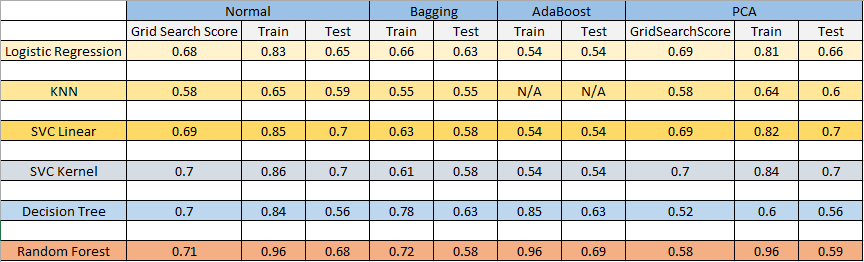